## Background / Motivation

University ranking matters to students. When applying to college, students often decide where to apply based on ranking. As students at a high-ranked university, we can attest to this. But, what exactly is ranking based on? We want to understand the mechanisms behind university ranking and what factors contribute to these rankings based on regression analysis. We would like to know why our school has its current ranking and identify areas where higher-ranked schools are performing better. 

## Problem statement 

Our project aims to predict the ranking of universities based on various factors. This is a classification problem as our objective is to classify universities into different categories: high, medium-high, medium-low, and low. Our goal is to provide stakeholders with information on which factors, such as expenditure per student, admit rate, and median SAT/ACT score, affect institutional rankings and which variables are most influential in the rankings. Thus, this is a prediction and inference problem. We are to predicting the response (ranking) directly and seeking to understand the relationship between the response and predictor variables (institutional attributes).

## Data sources

Data set 1:
We obtained the rankings of 311 universities and some relevant variables including average test scores, financial aid, and more from Kaggle (https://www.kaggle.com/datasets/theriley106/university-statistics?resource=download). 

Data set 2:
We obtained information from College Scorecard data (https://collegescorecard.ed.gov/data/) that includes various statistics such as enrollment, admission rate, tuition, and more. We selected some relevant variables to add on as predictors.

## Stakeholders


There are many stakeholders who care about university rankings: including students, parents, university faculty, employers, and the universities themselves. Students are interested in comparing what their university offers to institutions with comparable rankings. They also wish to identify the areas where higher-ranked schools are performing better. Meanwhile, universities want to comprehend how factors such as expenditure, test scores, and other statistical measures of performance impact their rankings. Identifying influential factors can streamline university initiatives to concentrate efforts to enhance their rankings. 

There is a lot of mystery surrounding the current college rankings process, as exhibited by the recent case of Columbia "gaming" its ranking in the US News and World Report [1]. We hope to demystify this process to the greatest extent possible.

## Data quality check / cleaning / preparation 


In [18]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("newdata.csv")
data = data[['act_avg', 'sat_avg','percent_receiving_aid',
       'cost_after_aid', 'hs_gpa_avg','businessRepScore', 'tuition',
       'engineeringRepScore','branches', 'admission_rate', 
       'ug_enrollment', 'percent_black', 'percent_hispanic',
       'percent_asian', 'percent_aian', 'percent_nhpi', 'percent_twoormore',
       'percent_nra', 'percent_unknown', 'percent_parttime', 'tuition_revenue_per',
       'instructional_expenditure_per', 'avg_faculty_salary',
       'ft_faculty_rate', 'avg_net_price', 'number_titleIV']]
data.describe()

,act_avg,sat_avg,percent_receiving_aid,cost_after_aid,hs_gpa_avg,businessRepScore,tuition,engineeringRepScore,branches,admission_rate,...,percent_twoormore,percent_nra,percent_unknown,percent_parttime,tuition_revenue_per,instructional_expenditure_per,avg_faculty_salary,ft_faculty_rate,avg_net_price,number_titleIV
count,291.000000,298.000000,143.000000,143.000000,243.000000,233.000000,300.000000,205.000000,300.00000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,23.024055,1218.808725,35.279720,33920.867133,3.546502,2.834335,31733.660000,2.806829,1.39000,0.611097,...,0.039304,0.061770,0.027311,0.111428,15438.420000,16758.043333,10374.606667,0.732048,20449.466667,1304.170000
std,4.159257,142.324641,17.163426,7625.493383,0.248005,0.590825,11721.751389,0.645613,1.67349,0.229278,...,0.020961,0.052405,0.036465,0.098351,8179.364727,16437.384128,2727.958684,0.186160,7666.600135,845.742792
min,15.000000,788.000000,5.000000,13186.000000,2.900000,2.000000,5460.000000,2.000000,1.00000,0.047300,...,0.000000,0.000900,0.000000,0.000000,3860.000000,1997.000000,4805.000000,0.070900,3901.000000,69.000000
25%,20.000000,1122.000000,21.000000,28613.000000,3.400000,2.400000,22537.500000,2.300000,1.00000,0.477650,...,0.028900,0.024000,0.008800,0.035350,9108.000000,9224.750000,8450.000000,0.612725,14562.750000,608.500000
50%,22.000000,1198.500000,35.000000,34621.000000,3.500000,2.700000,28859.000000,2.600000,1.00000,0.656700,...,0.036700,0.045200,0.017650,0.083850,13189.000000,12229.000000,9905.500000,0.750800,18466.000000,1108.500000
75%,26.000000,1314.500000,47.000000,38936.000000,3.700000,3.200000,41490.500000,3.100000,1.00000,0.784725,...,0.045625,0.085425,0.033000,0.156225,20396.250000,17050.750000,11750.000000,0.868925,25719.250000,1894.500000
max,34.000000,1558.000000,81.000000,51810.000000,4.000000,4.800000,57208.000000,4.900000,23.00000,1.000000,...,0.247600,0.320100,0.384200,0.671600,39806.000000,120956.000000,22924.000000,1.000000,41849.000000,3915.000000


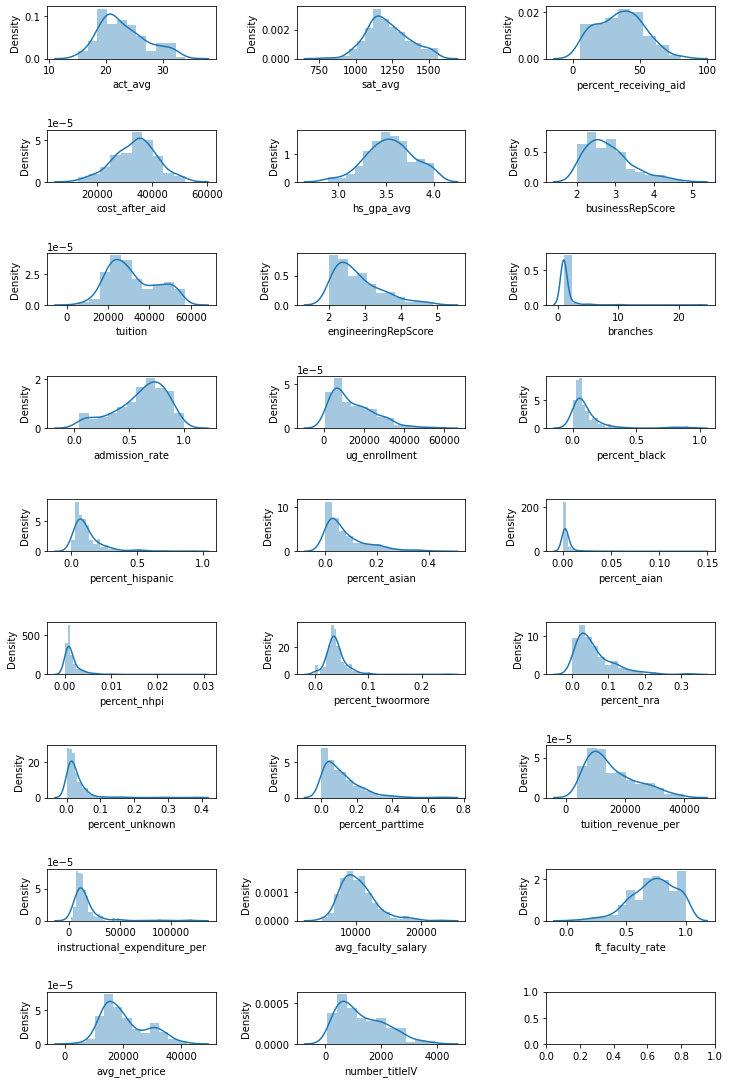

In [19]:
n_rows = 9,
n_cols = 3
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(10, 15))
fig.tight_layout(h_pad=5, w_pad=5)
for i, column in enumerate(data.columns):
    sns.distplot(data[column],ax=axes[i//n_cols,i%n_cols])

# Data quality check

#### Data Cleaning and Preparation
During the data cleaning process, we took several steps to ensure the accuracy and reliability of the dataset. Firstly, we removed columns that were deemed extraneous or did not contain useful values. Additionally, 11 institutions that were unranked were dropped from the dataset. We manully selected 54 predictors from the College Scorecard data set and added them for the institutions ranked in Kaggle. To minimize the presence of missing values in relevant variables, we prioritized data from College Scorecard and filled in missing values using the Kaggle dataset for variables that were common between both datasets, such as sat_avg. Furthermore, to avoid multicollinearity and improve the model's predictions, we removed duplicate columns that measured ranking.

## Exploratory data analysis

<AxesSubplot:xlabel='rankingSortRank', ylabel='Count'>

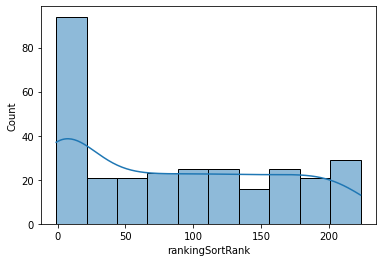

In [2]:
import pandas as pd
import seaborn as sns
dfeda = pd.read_csv('/Users/isabelpodolsky/Desktop/newdata.csv')
sns.histplot(dfeda.rankingSortRank, kde = True)

The main takeaway from the EDA was that the ranking variable contained some nonsense values. The expectation was that the ranking variable would have an even distribution, but instead there's a right skew. This means that we created two datasets: one was filtered to remove the -1 rankings, and the other was not. 

<AxesSubplot:xlabel='tuition', ylabel='rankingSortRank'>

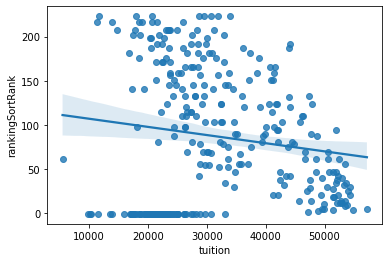

In [3]:
sns.regplot(x = 'tuition', y = 'rankingSortRank', data = dfeda)

<AxesSubplot:xlabel='act_avg', ylabel='rankingSortRank'>

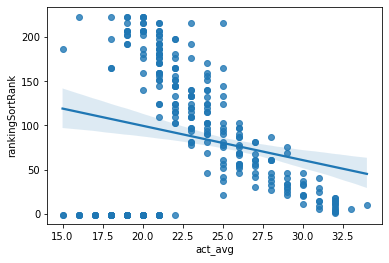

In [4]:
sns.regplot(x = 'act_avg', y = 'rankingSortRank', data = dfeda) 

Excluding the nonsense ranking variables, some variables, such as tuition and act_avg, showed a near-perfect negative linear correlation with the target variable. We know these variables should be in the equation. 

The pairplot is not included here but can be found in the code document -- this pairplot reveals that relationships either seemed to be linear or random. Thus, we did not transform any predictors. However, it did exhibit a lot of multicollinearity between variables. This means variable selection is the best path forward. After we fit the naive model, we will do variable selection. 

## Approach

_What kind of a model (linear / logistic / other) did you use? What performance metric(s) did you optimize and why?_

We used a logistic regression model. We optimized a performance metric that we customized specifically for this problem: if the model predicted the college category correctly, we added 1 to the total "correct count." After evaluating all categories, we divided total "correct count" by the number of observations in the dataset. Essentially, this metric calculated (TPR/FP+TN). Our primary focus was evaluating the number of true positives, because this is the most important determinant of if the model is properly sorting colleges into ranking categories. 

_Is there anything unorthodox / new in your approach?_

To select the best logistic regression model, we used last-one-out cross validation (LOOCV). 

_What problems did you anticipate? What problems did you encounter? Did the very first model you tried work?_

We anticipated there would be problems using LOOCV on a classification model because it was unfamiliar territory. These problems did occur. The very first model we tried did not work. However, we overcame these setbacks to create a working model. 

_Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction / inference?_

There were no models publicly available for the dataset we used because we used a novel dataset. We also used an approach that is novel in this space -- logistic regression, validated through LOOCV, for classification. So, we did not have any models to use for comparison. 

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

We did not use any code repositories.

## Developing the model

First, based on our exploratory data analysis, we found that there was multicollinearity and invalid/NA rankings. For the first problem, we ran a backward stepwise selection as well as a VIF analysis to isolate the variables that were causing this issue. 

We used two approaches for the second problem: (1) we filled those ranking with the mean (2) we dropped those observations with invalid rankings. We will first run code on dataset from approach (1) and then approach (2).

We first used dataset(1) to run the main model with 1 cutoff, which classified into categories of low and high. We then computed the accuracy and generated two datasets based on this model for the submodel (low category became dataset predicted_l, high category became dataset predicted_h).

We then used dataset(1) to run the main model with 3 cutoffs, which classified into categories of low, medium low, medium high and high. We then computed the accuracy and compared the accuracy with submodel.

For the first submodel, we used predicted_h to run the model again, getting predictions for medium high and high. We  also use predicted_l to run the second submodel, getting predictions for medium low and low. We then computed accuracy for two submodels.

We did the same process for dataset (2), figuring out which dataset is more suitable. We then compared the accuracy from the submodel and main model with 3 cutoffs.

We created models with all predictors involved in LOOCV and picked all the significant predictors in the model and expressed it in the equations below.

Based on our results, we found that dataset(2) with the dropped invalid rankings had a better accuracy across all models, so we decided to use dataset(2) for our final model.

**Put the final model equation**.

For model 1: 
rankingSortRank = -42.8449*businessRepScore*admission_rate -6.6828*act_avg + 0.0006*cost_after_aid - 21.5183*hs_gpa_avg - 13.26*businessRepScore + 21.8340*admission_rate - 0.0007*ug_enrollment + 163.4428*percent_parttime - 0.0025*avg_cost + 0.0032*instante_tuition - 0.0023*outstate_tuition - 0.0029*avg_faculty_salary

For model 2: 
rankingSortRank =

Category 1 – high/med-high: 178.55 -3.0538*act_avg	+ 106.5377*admission_rate + 96.1790*percent_hispanic + 185.6671*percent_unknown - -0.0014*ug_enrollment + 139.2400*percent_parttime 

Category 2 – med-low/low: 522.7379 - (5.8459 * act_avg) - (26.7875 * hs_gpa_avg) - (26.3266 * businessRepScore) - (0.0008 * tuition) + (percent_parttime * 162.3348) - (0.0013 * instructional_expenditure_per) - (avg_faculty_salary *	0.0043) - (avg_net_price * 0.0010)

**Important: This section should be rigorous and thorough. Present detailed information about decision you made, why you made them, and any evidence/experimentation to back them up.**

The baseline model using all predictors without any transformation/interaction has an accuracy of 82% if all data is used for train and predict on train, but the model is likely overfitting. Splitting the data into train and test by random sampling results in a classification accuracy of 78%.

## Limitations of the model with regard to inference / prediction

The model contains easily accessible data. It is easy for potential stakeholders to collect the data relating to the predictors in the model because most of the data in these datasets is available on the websites of various universities, as they are required by law to disclose their admissions statistics and demographics as part of the Common Dataset. The only limitation is that our model uses data released on a yearly basis, because these datasets are only updated annually. Common Datasets are typically released in October, while the US News & World Report rankings are generally released in February of the following calendar year. Thus, the ranking categories can be predicted generally about three or four months prior to the release of official rankings. The inference will also hold for year to year, as the stakeholders can assess what variables are most important for ranking based on the previous year and update them as needed.

_When will your model become too obsolete to be useful?_

The model will not become too obsolete to be useful for a long time, until college ranking is not significant to our stakeholders. The model will need to be updated if significant shifts to ranking occur, but the basic mechanics will be the same. 

## Conclusions and Recommendations to stakeholder(s)

There are two key takeaways for stakeholders. 

Firstly, to improve the ranking of a given university, the most important factors to be considered are the admissions rate, tuititon, average ACT score, and percentage of minority students. Universities should focus on decreasing their admissions rate (i.e. admit less students or find a way to increase total applications, perhaps through marketing), while simultaneously increasing the average ACT score, tuition, and proportion of minority students at their schools (i.e. admit more students with high ACT scores or who are minorities, ideally both). Additionally, for schools in the low and medium low categories looking to move upwards, admitting students with high high school GPAs and improving their business reputation score (through branding and improving the public image) will be most helpful, while also trying to lower the proportion of students that are part-time. These insights are based on looking at the statistically significant predictors and considering how their coefficients affect the predicted ranking. Finally, schools in the medium-high category will have the hardest time moving into the high category, as evidenced by the lower classification accuracy for medium-high versus high. This is likely because the higher a university is ranked, the more minute the differences between it and its peer institutions are -- whereas the difference between a low university and a high university is very clear-cut.

Secondly, stakeholders will need to be aware of the fact that they should update the model annually as new data and rankings come out. Every year, universities publish their common data set, which contains information about admission and enrollment statistics. New rankings are also calculated every year, so by combining these two datasets every year, more insightful analysis can be done as trends vary over time.

## GitHub and individual contribution {-}

Put the **Github link** for the project repository.

https://github.com/shrayvaidya/datasci303-2

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Peggy Han</td>
    <td>Data cleaning and preparation</td>
    <td>Cleaned data to drop irrelevant variables; prepared final data set by selecting potentially significant predictors to add on and minimizing number of missing values</td>
    <td>9</td>
  </tr>
  <tr>
    <td>Mingyi Gong</td>
    <td>Develop main model with LOOCV</td>
    <td>develop main model that classify 2 categories for generating dataset for submodels; develop main model with 3 cutoff the directly classify into 4 categories, which will compare with submodel </td>
    <td>13</td>
  </tr>
    <tr>
    <td>Izzy Podolsky</td>
    <td>Performed EDA, developed medium-low/low submodel</td>
    <td>Did much of the introductory writing, prepared dataviz and other EDA to determine need for variable transformation (found none), ran backward selection (which proved irrelevant), developed medium-low/low submodel</td>
    <td>7</td>  
  </tr>
    <tr>
    <td>Shray Vaidya</td>
    <td>Developed high and medium high submodel</td>
    <td>developed model to further subdivide the high category into high and medium high, also worked on variable selection to remove multicollinearity, wrote significant portions of written report</td>
    <td>6</td>   
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

Izzy -- GitHub made collaboration easier, but I had no prior exposure, so there was a pretty steep learning curve. 

For the most part, we all adjusted to GitHub well and were able to use it to collaborate.

## References {-}

[1] https://www.theguardian.com/us-news/2022/sep/16/columbia-whistleblower-us-news-rankings-michael-thaddeus

[2] https://www.statology.org/leave-one-out-cross-validation-in-python/

[3]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

[4] https://stackoverflow.com/questions/47390313/sklearn-loocv-split-returning-a-smaller-test-and-train-array-than-expected


[5] https://www.kaggle.com/datasets/theriley106/university-statistics?resource=download

[6] https://collegescorecard.ed.gov/data/